# Loan Prediction Analysis

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the data
train=pd.read_csv('train_ctrUa4K.csv')
test=pd.read_csv('test_lAUu6dG.csv')

In [3]:
train.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [7]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1d2ac127748>,
 'caps': [<matplotlib.lines.Line2D at 0x1d2a98a4508>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d2abe6cac8>],
 'medians': [<matplotlib.lines.Line2D at 0x1d2abaeb108>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d2abe6cdc8>],
 'means': []}

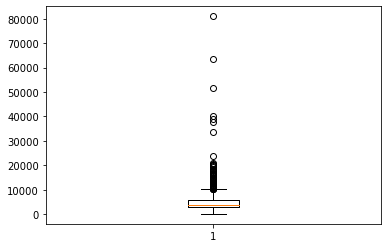

In [9]:
plt.boxplot(train.ApplicantIncome)

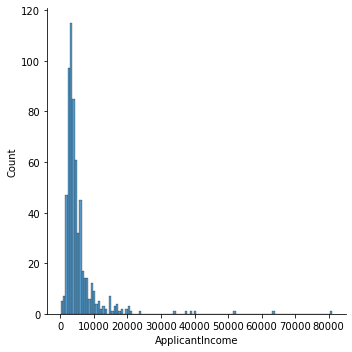

In [9]:
sns.displot(train.ApplicantIncome)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

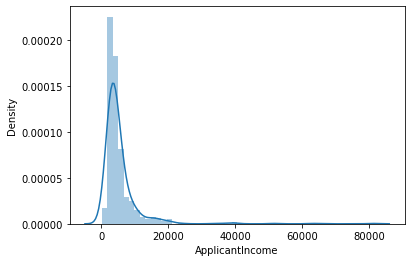

In [10]:
sns.distplot(train.ApplicantIncome.dropna())

<AxesSubplot:xlabel='Education', ylabel='ApplicantIncome'>

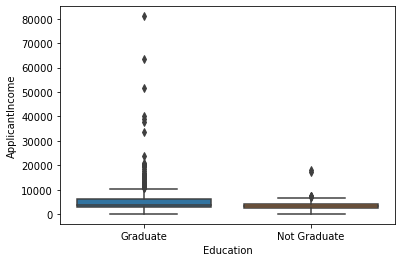

In [11]:
sns.boxplot(x='Education',y='ApplicantIncome',data=train)

In [12]:
# turn loan credit history into binary
temp=train
temp['Loan_Status']=train['Loan_Status'].apply(lambda x: 0 if x=='N' else 1)
temp.groupby('Credit_History').mean()['Loan_Status']

Credit_History
0.0    0.078652
1.0    0.795789
Name: Loan_Status, dtype: float64

In [13]:
#categorical
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
#numerical
train['LoanAmount'].fillna(train['LoanAmount'].mean(), inplace=True)

In [14]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Next we have to handle the outliers , one solution is just to remove them but we can also log transform them to nullify their effect which is the approach that we went for here. Some people might have a low income but strong CoappliantIncome so a good idea is to combine them in a TotalIncome column. Log transformation also de-emphasizes outliers and allows us to potentially obtain a bell-shaped distribution. The idea is that taking the log of the data can restore symmetry to the data. ... If the distance between each variable is important, then taking the log of the variable skews the distance.

In [15]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['TotalIncome']= train['ApplicantIncome'] +train['CoapplicantIncome'] 
train['TotalIncome_log']=np.log(train['TotalIncome'])

<AxesSubplot:ylabel='Frequency'>

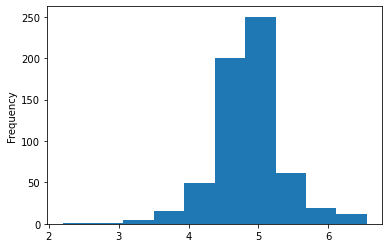

In [16]:
train['LoanAmount_log'].plot.hist()

In [17]:
from sklearn.preprocessing import LabelEncoder
category= ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status'] 
encoder= LabelEncoder()
for i in category:
    train[i] = encoder.fit_transform(train[i])
    train.dtypes

In [18]:
train.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [19]:
import sys
import pandas as pd
import scipy as sp
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [20]:
#Import the models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [21]:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

In [22]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model, train,predictor_var,outcome_var)


Accuracy : 80.945%
